In [ ]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter


In [ ]:
dtype_dict = {
    'user_phone': 'object',
    'user_id': 'object',
    'event_status': 'object',
    'source_medium': 'object',
    'event_type': 'object',
    'currency': 'object',
    'product_type': 'object',
    'interface': 'object',
    'registration_dtm': 'object',
    'delete_dtm': 'object',
    'campaign_type': 'object',
    'campaign_start_dtm': 'object',
    'campaign_end_dtm': 'object',
    'utm_campaign': 'object',
    'currency': 'object',
    'campaign_cost': 'float64'
}


In [ ]:
users_data = dd.read_csv('/content/drive/MyDrive/Practice/users_data.csv', dtype={'user_phone': 'object', 'user_id': 'object', 'registration_dtm': 'object', 'delete_dtm': 'object'})
adv_data = dd.read_csv('/content/drive/MyDrive/Practice/adv_data.csv', dtype={'user_id': 'object', 'campaign_type': 'object', 'campaign_start_dtm': 'object', 'campaign_end_dtm': 'object', 'source_medium': 'object', 'utm_campaign': 'object', 'interface': 'object', 'currency': 'object', 'campaign_cost': 'float64'})
event_data = dd.read_csv('/content/drive/MyDrive/Practice/event_data.csv', dtype={'user_phone': 'object', 'event_type': 'object', 'event_dtm': 'object', 'event_status': 'object', 'update_dtm': 'object', 'payout': 'float64', 'currency': 'object', 'product_type': 'object'})

In [ ]:
def standardize_phone_number(phone):
    if pd.isna(phone):
        return phone
    phone = phone.strip()
    if phone.startswith('+7'):
        return '8' + phone[2:]
    if phone.startswith('7'):
        return '8' + phone[1:]
    return phone

In [ ]:
users_data['user_phone'] = users_data['user_phone'].map(standardize_phone_number)
event_data['user_phone'] = event_data['user_phone'].map(standardize_phone_number)

In [ ]:
unique_users_phones = set(users_data['user_phone'].dropna().unique())
unique_event_phones = set(event_data['user_phone'].dropna().unique())

In [ ]:
common_phones = unique_users_phones.intersection(unique_event_phones)

In [ ]:
total_users_phones = len(unique_users_phones)
total_event_phones = len(unique_event_phones)
total_common_phones = len(common_phones)

In [ ]:
# percentage_users_common = (total_common_phones / total_users_phones) * 100 if total_users_phones > 0 else 0
# percentage_event_common = (total_common_phones / total_event_phones) * 100 if total_event_phones > 0 else 0

In [ ]:
# print(f"Total unique phone numbers in users_data: {total_users_phones}")
# print(f"Total unique phone numbers in event_data: {total_event_phones}")
# print(f"Total common phone numbers: {total_common_phones}")
# print(f"Percentage of users_data phones that are common: {percentage_users_common:.2f}%")
# print(f"Percentage of event_data phones that are common: {percentage_event_common:.2f}%")

In [ ]:
event_data_enriched = dd.merge(event_data, users_data[['user_phone', 'user_id']], on='user_phone', how='left')

In [ ]:
final_data = dd.merge(event_data_enriched, adv_data, on='user_id', how='inner')

In [ ]:
# print(final_data.dtypes)
# print(final_data.describe().compute())

In [ ]:
# missing_values = final_data.isnull().sum().compute()
# print("Пропущенные значения:\n", missing_values)

# total_rows = len(final_data)
# missing_values = final_data.isnull().sum().compute()
# missing_percentage = (missing_values / total_rows) * 100
# print("Процент пропущенных значений по каждому параметру:\n", missing_percentage)


In [ ]:
print(final_data.dtypes)


id                    string[pyarrow]
user_phone            string[pyarrow]
event_type            string[pyarrow]
event_dtm             string[pyarrow]
event_status          string[pyarrow]
update_dtm            string[pyarrow]
payout                        float64
currency_x            string[pyarrow]
product_type          string[pyarrow]
user_id               string[pyarrow]
campaign_type         string[pyarrow]
campaign_start_dtm    string[pyarrow]
campaign_end_dtm      string[pyarrow]
source_medium         string[pyarrow]
utm_campaign          string[pyarrow]
interface             string[pyarrow]
currency_y            string[pyarrow]
campaign_cost                 float64
dtype: object


<ipython-input-16-f7cdda949088>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette='viridis')


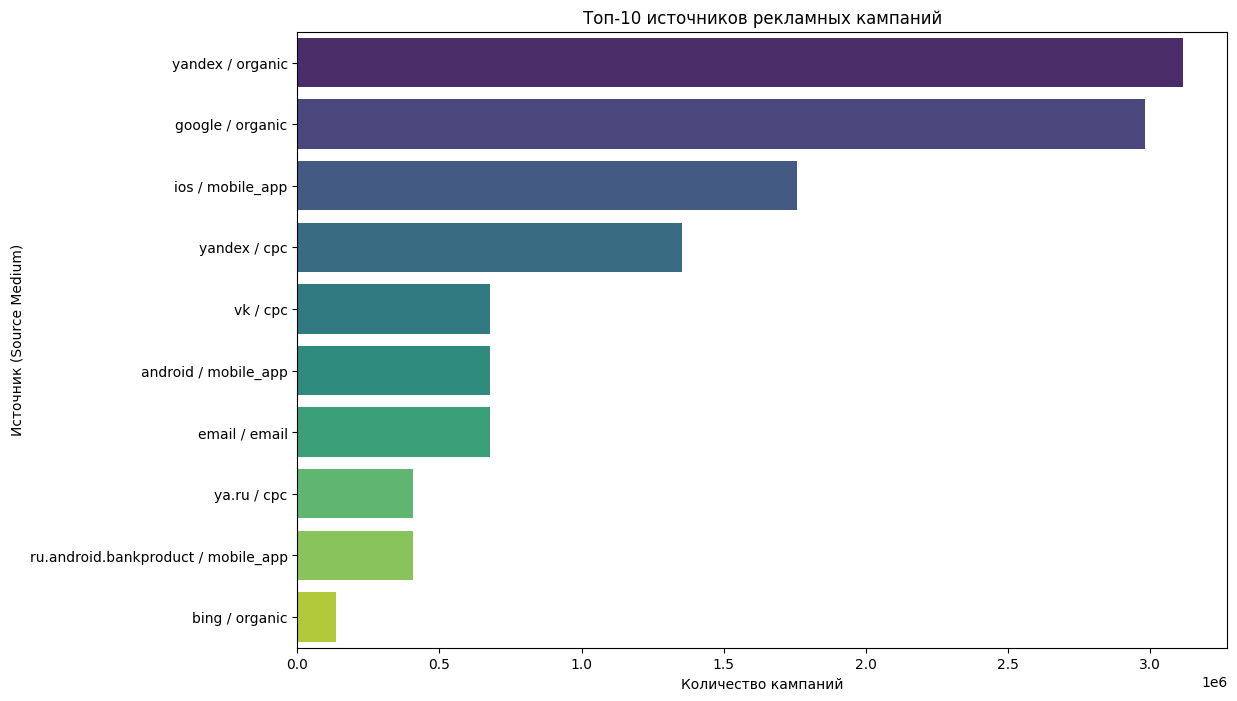

In [ ]:
source_counts = final_data['source_medium'].value_counts().compute()

top_sources = source_counts.nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_sources.values, y=t op_sources.index, palette='viridis')
plt.title('Топ-10 источников рекламных кампаний')
plt.xlabel('Количество кампаний')
plt.ylabel('Источник (Source Medium)')
plt.show()

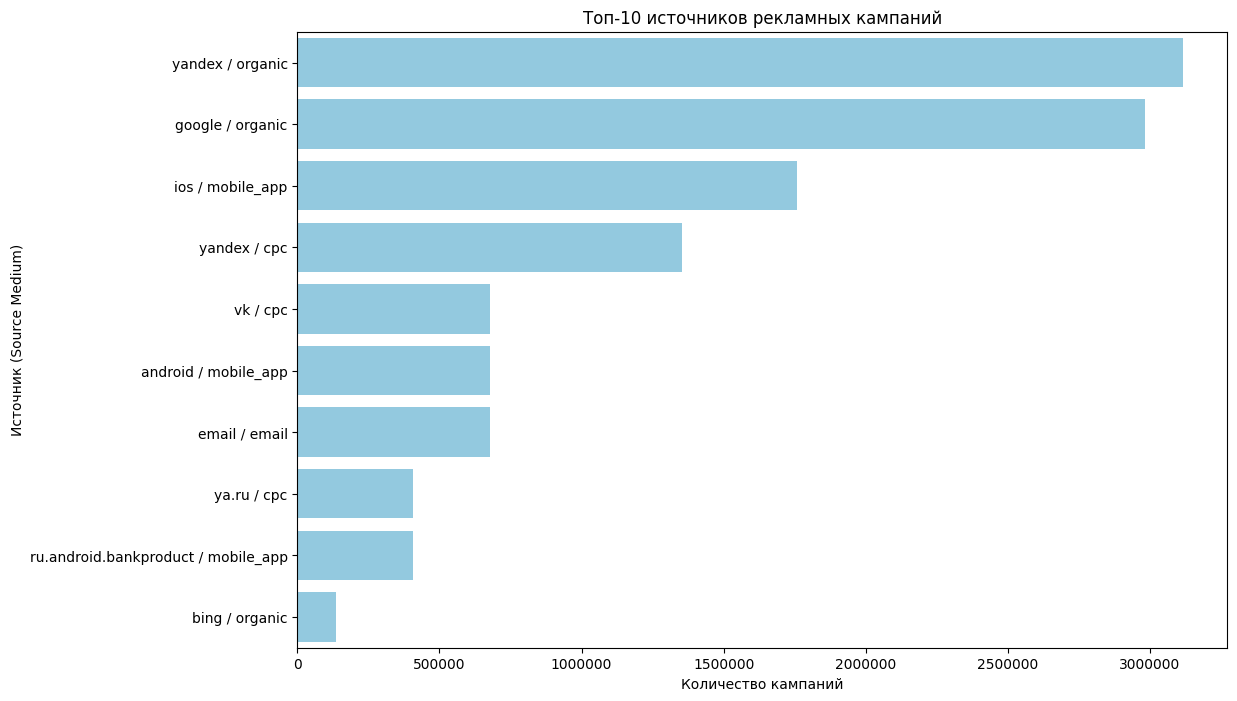

In [ ]:
def human_readable(num, pos):
    return f'{int(num)}'

source_counts = final_data['source_medium'].value_counts().compute()

top_sources = source_counts.nlargest(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_sources.values, y=top_sources.index, color='skyblue')
ax.xaxis.set_major_formatter(FuncFormatter(human_readable))
plt.title('Топ-10 источников рекламных кампаний')
plt.xlabel('Количество кампаний')
plt.ylabel('Источник (Source Medium)')
plt.show()

Числовые столбцы в датасете: Index(['payout', 'campaign_cost'], dtype='object')


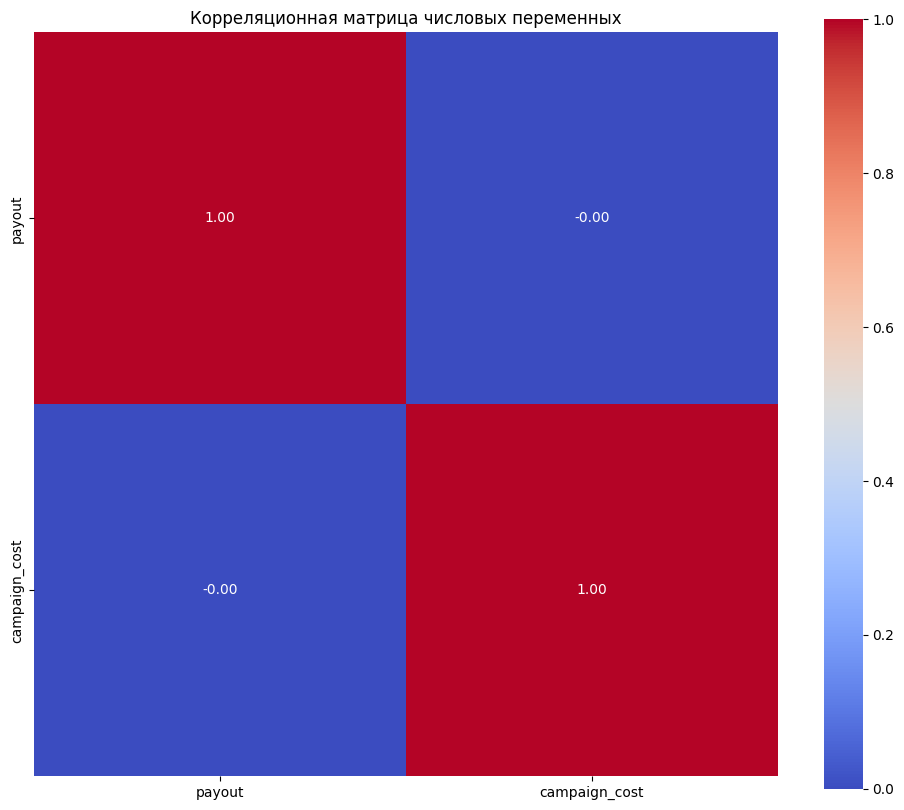

In [ ]:
numeric_data = final_data.select_dtypes(include=['float64', 'int64'])

print("Числовые столбцы в датасете:", numeric_data.columns)

correlation_matrix = numeric_data.corr().compute()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица числовых переменных')
plt.show()

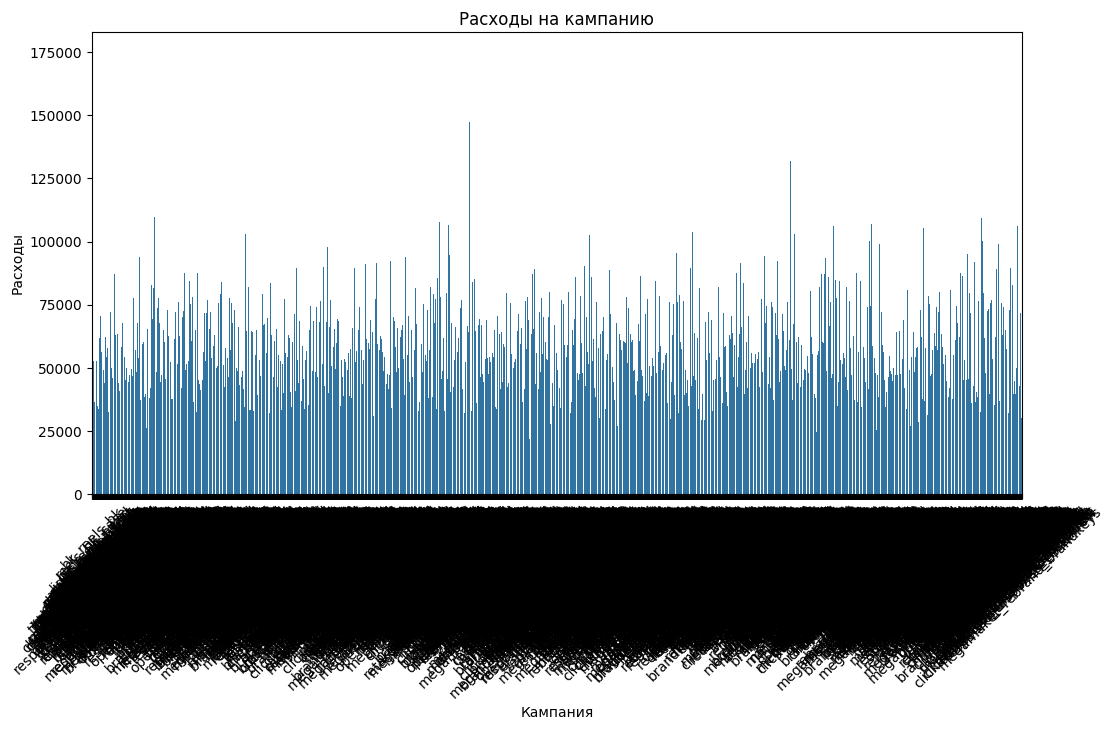

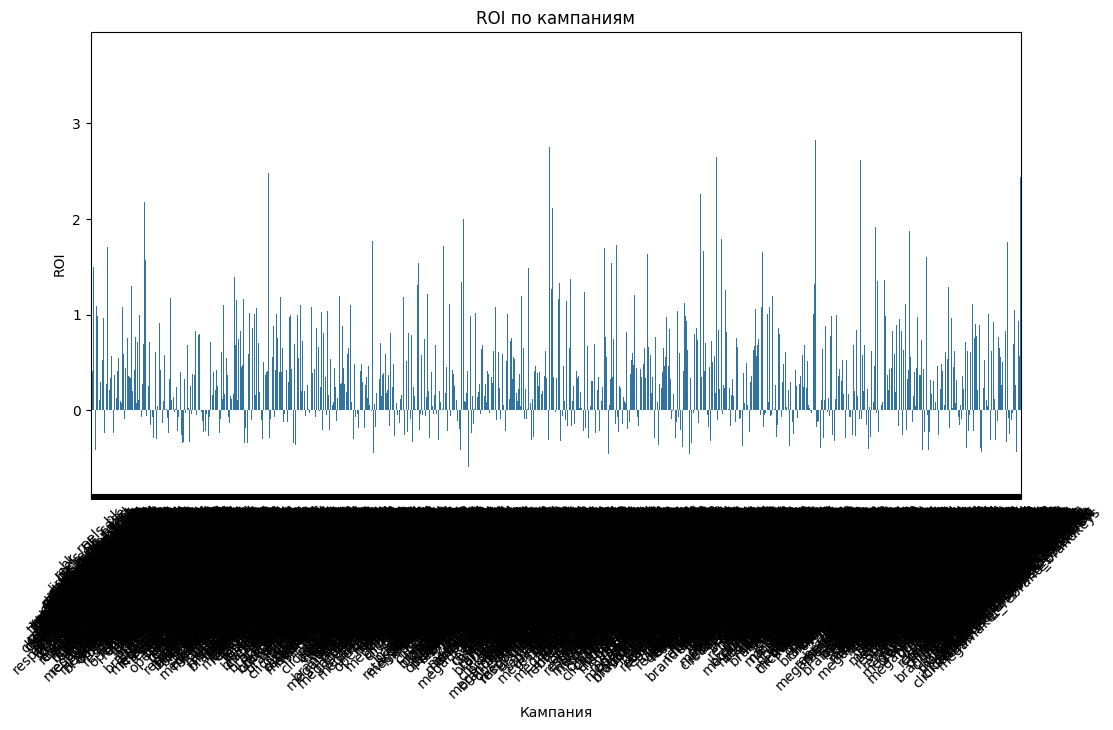

In [ ]:
campaign_data = final_data.groupby('utm_campaign').agg({'campaign_cost': 'sum', 'payout': 'sum'}).compute()

campaign_data['ROI'] = (campaign_data['payout'] - campaign_data['campaign_cost']) / campaign_data['campaign_cost']

plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_data.index, y='campaign_cost', data=campaign_data)
plt.title('Расходы на кампанию')
plt.xlabel('Кампания')
plt.ylabel('Расходы')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_data.index, y='ROI', data=campaign_data)
plt.title('ROI по кампаниям')
plt.xlabel('Кампания')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()

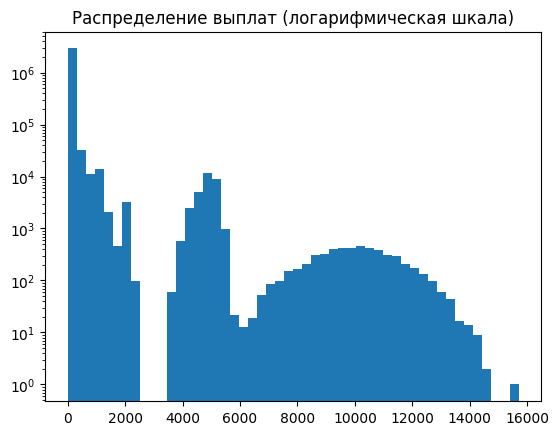

In [ ]:
payout_data = final_data['payout'].compute()
plt.hist(payout_data, bins=50, log=True)
plt.title('Распределение выплат (логарифмическая шкала)')
plt.show()

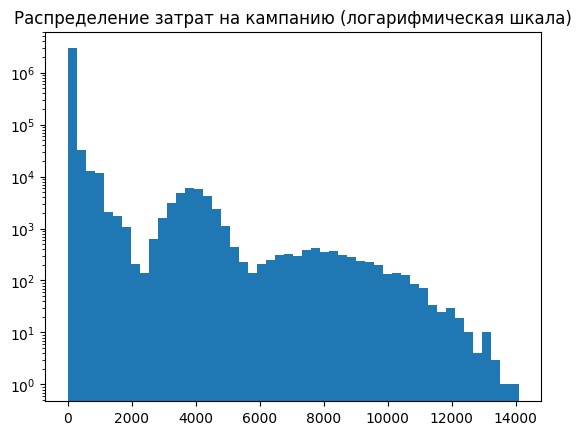

In [ ]:
campaign_cost_data = final_data['campaign_cost'].compute()
plt.hist(campaign_cost_data, bins=50, log=True)
plt.title('Распределение затрат на кампанию (логарифмическая шкала)')
plt.show()

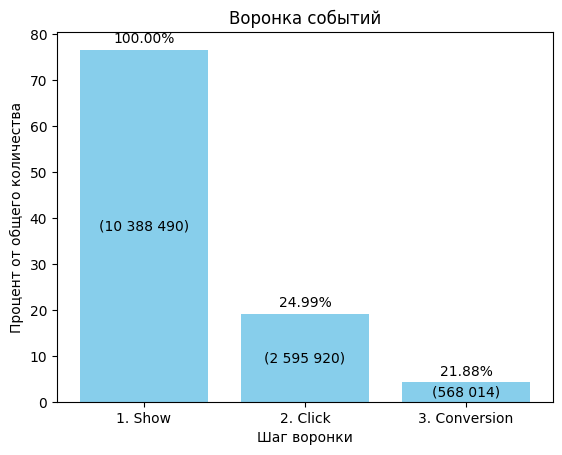

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

event_type_counts = final_data['event_type'].value_counts().compute()

total_events = event_type_counts.sum()
event_type_percentages = (event_type_counts / total_events) * 100

stages = ['show', 'click', 'conversion']
labels = ['1. Show', '2. Click', '3. Conversion']

event_type_percentages = event_type_percentages.loc[stages]
event_type_counts = event_type_counts.loc[stages]

relative_percentages = [
    100,
    (event_type_counts['click'] / event_type_counts['show']) * 100 if event_type_counts['show'] > 0 else 0,
    (event_type_counts['conversion'] / event_type_counts['click']) * 100 if event_type_counts['click'] > 0 else 0
]

fig, ax = plt.subplots()
bars = ax.bar(labels, event_type_percentages.values, color='skyblue')

ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', ' ')))

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate(f'{relative_percentages[i]:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    ax.annotate(f'({format(event_type_counts.values[i], ",d").replace(",", " ")})', xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                xytext=(0, 0), textcoords="offset points", ha='center', va='center')

plt.title('Воронка событий')
plt.xlabel('Шаг воронки')
plt.ylabel('Процент от общего количества')
plt.show()


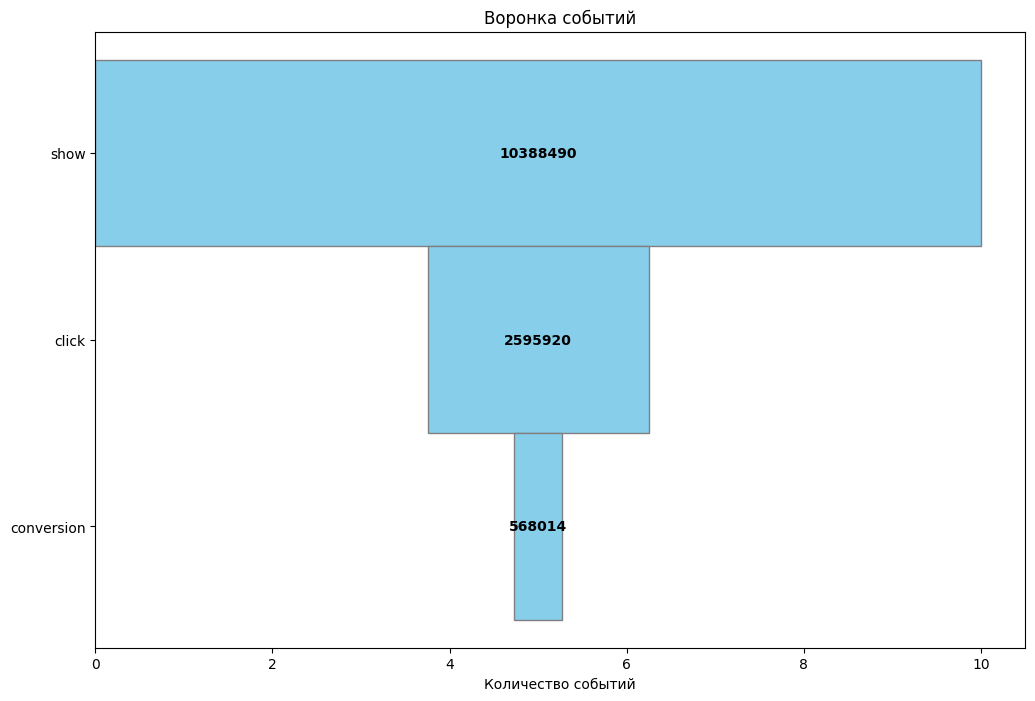

In [ ]:
event_type_counts = final_data['event_type'].value_counts().compute()
events = ['show', 'click', 'conversion']
counts = [event_type_counts.get(event, 0) for event in events]

fig, ax = plt.subplots(figsize=(12, 8))

base_height = 1.0
widths = [count / max(counts) * 10 for count in counts]
lefts = [5 - w / 2 for w in widths]

for i, (count, width, left) in enumerate(zip(counts, widths, lefts)):
    ax.barh(y=i, width=width, height=base_height, left=left, color='skyblue', edgecolor='grey')
    ax.text(left + width / 2, i, f'{count}', va='center', ha='center', fontweight='bold', color='black')

ax.set_yticks(range(len(events)))
ax.set_yticklabels(events)
ax.set_xlabel('Количество событий')
ax.invert_yaxis()
plt.title('Воронка событий')
plt.show()

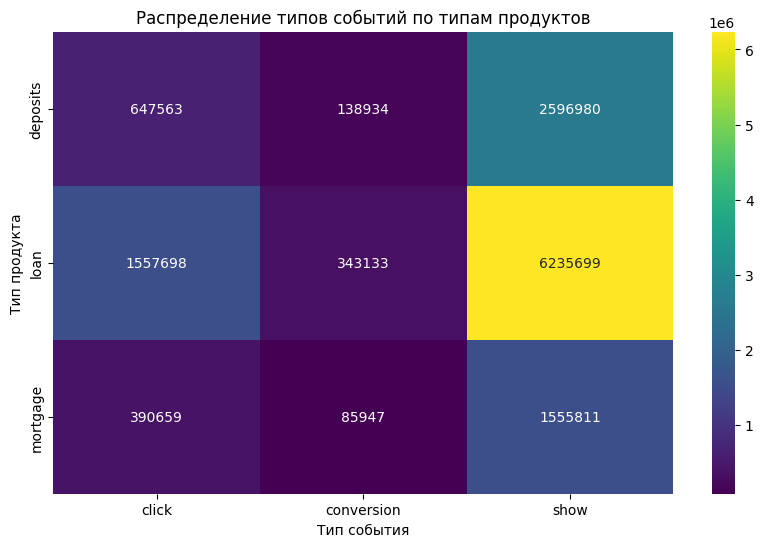

In [ ]:
event_product_distribution = final_data.groupby(['product_type', 'event_type']).size().compute()
event_product_distribution = event_product_distribution.unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(event_product_distribution, annot=True, fmt="d", cmap='viridis')
plt.title('Распределение типов событий по типам продуктов')
plt.ylabel('Тип продукта')
plt.xlabel('Тип события')
plt.show()

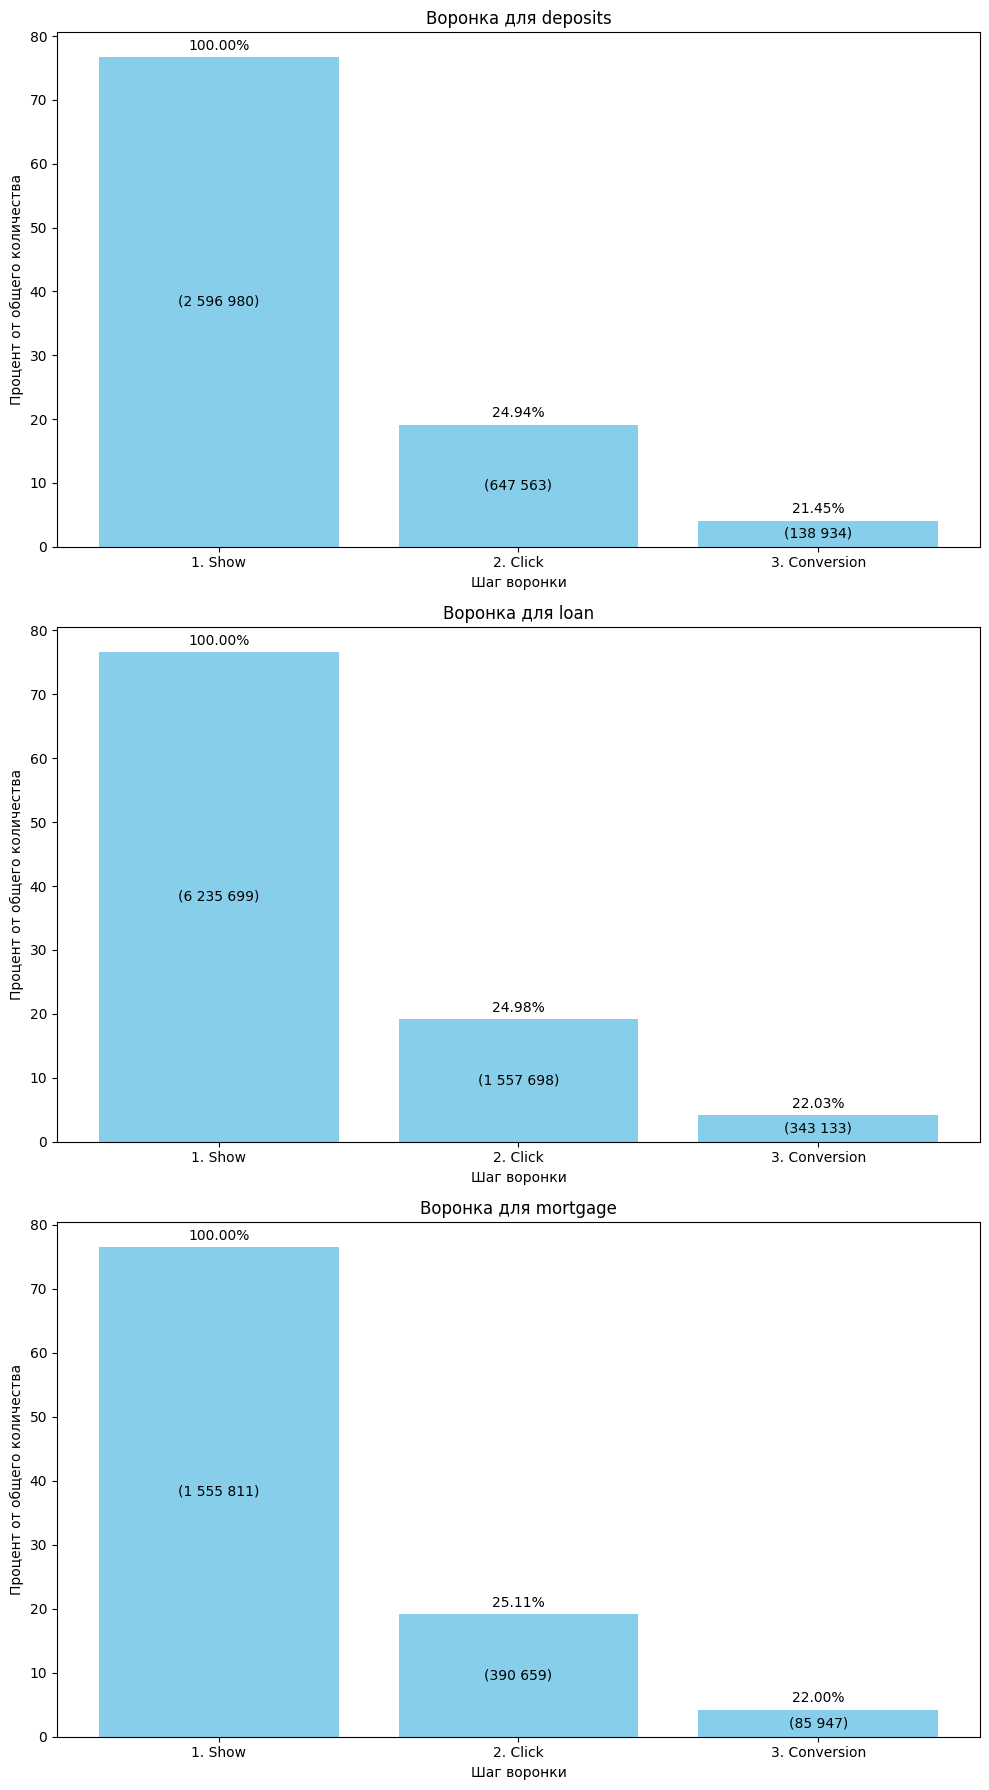

In [ ]:
product_types = final_data['product_type'].unique().compute()

fig, axes = plt.subplots(nrows=len(product_types), figsize=(10, 6 * len(product_types)))

if len(product_types) == 1:
    axes = [axes]

for ax, product_type in zip(axes, product_types):
    product_data = final_data[final_data['product_type'] == product_type]

    event_type_counts = product_data['event_type'].value_counts().compute()

    total_events = event_type_counts.sum()
    event_type_percentages = (event_type_counts / total_events) * 100

    stages = ['show', 'click', 'conversion']
    labels = ['1. Show', '2. Click', '3. Conversion']

    event_type_percentages = event_type_percentages.loc[stages]
    event_type_counts = event_type_counts.loc[stages]

    relative_percentages = [
        100,
        (event_type_counts['click'] / event_type_counts['show']) * 100 if event_type_counts['show'] > 0 else 0,
        (event_type_counts['conversion'] / event_type_counts['click']) * 100 if event_type_counts['click'] > 0 else 0
    ]

    bars = ax.bar(labels, event_type_percentages.values, color='skyblue')

    ax.get_yaxis().set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', ' ')))

    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.annotate(f'{relative_percentages[i]:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
        ax.annotate(f'({format(event_type_counts.values[i], ",d").replace(",", " ")})', xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                    xytext=(0, 0), textcoords="offset points", ha='center', va='center')

    ax.set_title(f'Воронка для {product_type}')
    ax.set_xlabel('Шаг воронки')
    ax.set_ylabel('Процент от общего количества')

plt.tight_layout()
plt.show()